# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```pc_tip``` e ```bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
# Carregando as bibliotecas 
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [2]:
# Importando a biblioteca 
tips = sns.load_dataset('tips')

In [3]:
# Criando tip_pct e net_bill
tips['bill'] = tips['total_bill'] - tips['tip']
tips['pc_tip'] = tips['tip'] / tips['bill']

tips.head(2)

,total_bill,tip,sex,smoker,day,time,size,bill,pc_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,0.191244


                            OLS Regression Results                            
Dep. Variable:                 pc_tip   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.52e-06
Time:                        00:15:49   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

(0.0, 0.505398619388979)

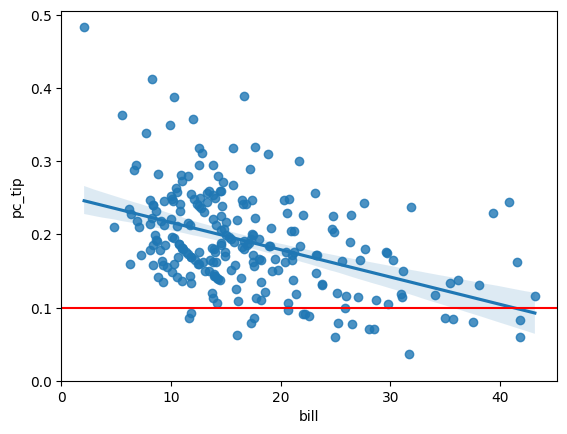

In [4]:
# Como estou reproduzindo o modelo da Tarefa 1 deste mesmo módulo passsarei pelo estudo de forma direta
# Ajustando o modelo
reg_taf1 = smf.ols('pc_tip ~ bill', data=tips).fit()
print(reg_taf1.summary())

# Construindo o gráfico de dispersão
sns.regplot(x = 'bill', y = 'pc_tip', data = tips[tips['pc_tip'] <.5])

plt.axhline(y = 0.1, color='r', label='10%')

plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. ajuste o modelo de ```pc_tip``` em função do logaritmo de ```bill```.

In [5]:
# Ajuste do modelo, como o valor da conta nunca será negativo ou igual a 0, não é necessário nenhum ajuste para o 
# cáluclo logarítmico
reg_1 = smf.ols('pc_tip ~ np.log(bill)', data = tips).fit()
reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 pc_tip   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.62e-13
Time:                        00:15:49   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6181      0.054     11.444      0.000       0.512       0.724
np.log(bill)    -0.1534      0.020     -7.820      0.000      -0.192      -0.115
==============================================================================
Omnibus:                      440.899   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           171509.052
Skew:                           9.850   Prob(JB):                         0.00
Kurtosis:                     131.381   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

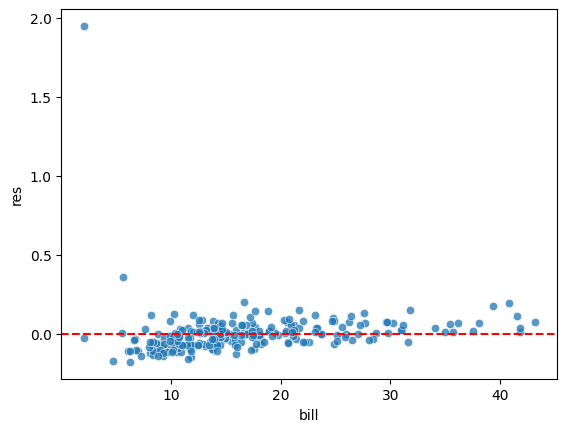

In [6]:
# Contruindo o Gráfico de resíduos
tips['res'] = reg_1.resid

sns.scatterplot(x = 'bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

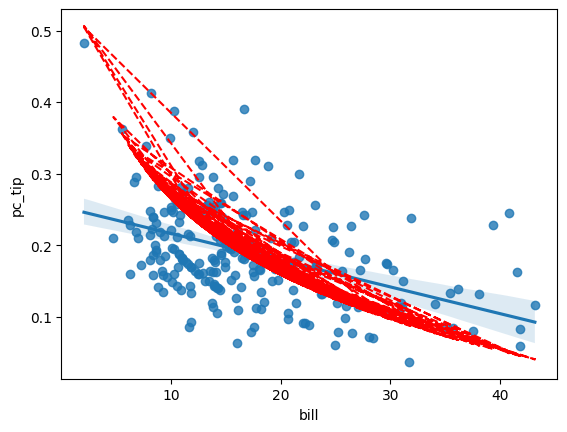

In [7]:
# Contruindo o gráfico de dispersão 
# Para melhor vizualização deste gráfico usarei a filtragem do outlier observada nos estudos anteriores dessa base de dados
sns.regplot(x = 'bill', y = 'pc_tip', data = tips[tips['pc_tip']<.5])
plt.plot(tips['bill'], reg_1.fittedvalues, 'r,--')

###  3. ajuste o modelo de ```pc_tip``` em função de um polinômio de segundo grau em ```bill```.

In [8]:
# Ajuste do modelo
reg_2 = smf.ols('pc_tip ~ np.power(bill, 2)', data = tips).fit()
reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 pc_tip   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     13.48
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           0.000297
Time:                        00:15:49   Log-Likelihood:                 102.94
No. Observations:                 244   AIC:                            -201.9
Df Residuals:                     242   BIC:                            -194.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.2388      0.014     16.725      0.000       0.211       0.267
np.power(bill, 2)    -0.0001   2.89e-05     -3.672      0.000      -0.000   -4.91e-05
==============================================================================
Omnibus:                      471.934   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           242314.902
Skew:                          11.261   Prob(JB):                         0.00
Kurtosis:                     155.732   Cond. No.                         692.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Como o valor de R² encontrado é muito menor que os anteriores não usarei os estudos de gráficos.

###  4. ajuste um modelo no log do ```pc_tip``` em função de ```bill```. Calcule o $R^2$ também em ```pc_tip```

In [9]:
# Ajuste considerando que não há valor negativo ou 0 para o o valor da pc_bill, assim como no item 2 dessa tarefa.
reg_3 = smf.ols('np.log(pc_tip) ~ bill', data = tips).fit()
reg_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(pc_tip)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           8.27e-16
Time:                        00:15:49   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.000      -1.385      -1.165
bill          -0.0259      0.003     -8.630      0.000      -0.032      -0.020
==============================================================================
Omnibus:                       49.929   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.392
Skew:                           0.664   Prob(JB):                     7.78e-57
Kurtosis:                       7.864   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# Calculando o R² na base pc_tip
tips['pred_%tip'] = np.exp(reg_3.fittedvalues)
tips[['pred_%tip', 'pc_tip']].corr().iloc[0, 1]**2

0.1144098859252977

Como o valor de R² encontrado é muito menor que os anteriores não usarei os estudos de gráficos.

###  5. ajuste um modelo no log do ```pc_tip``` em função do log de ```bill```. Calcule o $R^2$ também em ```pc_tip```.

In [11]:
# Ajuste do modelo 
reg_4 = smf.ols('np.log(pc_tip) ~ np.log(bill)', data = tips).fit()
print(reg_4.summary())

#Calculando o valor de R² na base de pc_tip
tips['pred_%tip'] = np.exp(reg_4.fittedvalues)
tips[['pred_%tip', 'pc_tip']].corr().iloc[0, 1]**2

                            OLS Regression Results                            
Dep. Variable:         np.log(pc_tip)   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           5.20e-20
Time:                        00:15:49   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3942      0.133     -2.961   

0.30894874740322276

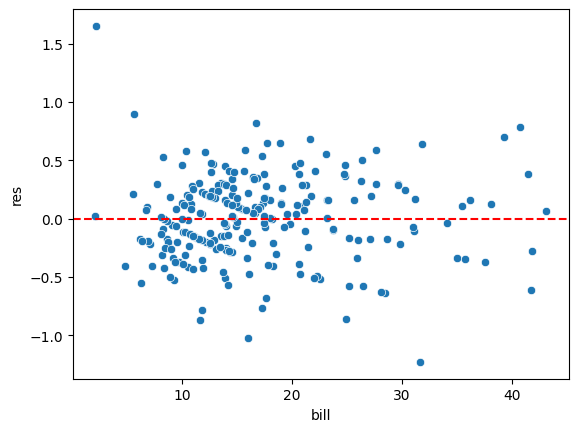

In [12]:
# Contruindo o gráfico de resíduos 
# Armazenando o valor do resíduo
tips['res'] = reg_4.resid

sns.scatterplot(x = 'bill', y = 'res', data = tips)
plt.axhline(y = 0, color = 'r', linestyle = '--')

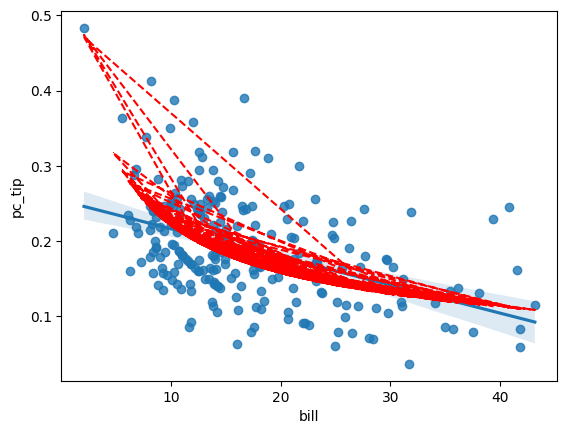

In [13]:
# Contruindo o gráfico de dispersão
# Para melhor vizualização deste gráfico usarei a filtragem do outlier observada nos estudos anteriores dessa base de dados
sns.regplot(x = 'bill', y = 'pc_tip', data = tips[tips['pc_tip']<.5])
plt.plot(tips['bill'], tips['pred_%tip'], 'r,--')

###  6. qual modelo resultou no melhor ajuste?

Os valores de R², em ordem decrescente está mostrado a seguir: <br>
*5. log(pc_tip) ~ log(bill) : 0,308 <br>
*2. pc_tip ~ log(bill): 0,202 <br>
*4. log(pc_tip) ~ bill: 0,114 <br>
*1. pc_tip ~bill: 0,091 <br>
*3. pc_tip ~ bill²: 0,053 <br>
Assim, nota-se que o melhor ajuste do modelo é o calculado no item 5, entre os logaritimos, uma vez que o valor de R², na base de pc_tip, é maior ali. Também, percebe-se isso pelo ajute gráfico dos resíduos, em especial, representado no item 5. 